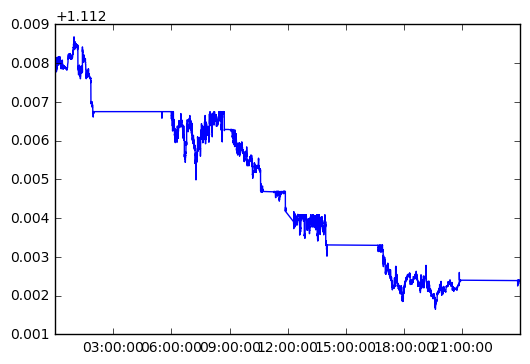

In [1]:
import sys, os

import numpy as np
import pandas as pd
import datetime as dt
from dateutil import parser
import logging

import velidb.btcommon as bt
#import velibt.velidb as vdb
from velidb.tobcache import tob_cache

logger = logging.getLogger()
logger.setLevel(logging.DEBUG)

year = 2016
month = 10
date = 10
days = 1

source = ['BTMU_HC_1']
currency = ['EURUSD']
# source = ['BTMU_HC_1', 'EBS_ULTRA_NY_A', 'EBS_LIVE_NY_XML_A']
# currency = ['EURUSD', 'GBPUSD', 'USDJPY', 'USDHCHF', 'EURCHF', 'AUDUSD', 'USDCAD', 'NZDUSD', 'USDMZN', 'EURSEK',
#             'USDHKD', 'USDZAR', 'EURNOK', 'EURCZK', 'EURDKK', 'EURHUF', 'USDCNH', 'EURPLN']

class BTMUAnalysis(object):
    def __init__(self, start, end):
        self.start = start
        self.end   = end

    def loading_data(self):
        for s in source:
            for c in currency:
                for day in range(0, days):
                    cac = tob_cache('/home/jsong/notebooks/BTMU/tob_cache', logger)
                    start = d = dt.datetime(year, month, date + day, 0)
                    df = cac.getData(bt.asset_class.FX, s, c, start)   # this is already the 
                    #return(df)
                    #sys.exit(0)

    def to_dataframe(self, data):
        out = []
        tmptime = 0
        for x in data.iterrows():
            temp = x
            if x["timestamp"] == tmptime:
                x["timestamp"] = x["timestamp"] + 1
                out.append([x["timestamp"], x["bid"], x["bid_size"], x["offer"], x["offer_size"]])
                tmptime = x["timestamp"]
            else:
                out.append([x["timestamp"], x["bid"], x["bid_size"], x["offer"], x["offer_size"]])
                tmptime = x["timestamp"]
        out = pd.DataFrame(out)
        out.columns = ['timestamp', 'bid', 'bid_size', 'offer', 'offer_size']

        ind = np.array( out['timestamp'].duplicated() )
        while any(ind):
            #Note: here 9 is a hard coding activity. len(str(x)) does not work
            out['timestamp'][ind] = out['timestamp'][ind].map(lambda x: x + 1 )
            ind = np.array( out['timestamp'].duplicated() )

        return(out)

    def do_analysis(self):
        print("all the analysis will go here")
        occs = 10
        statis = 100
        return (occs, statis)

def run_model(start, end):
    mod = BTMUAnalysis(start, end)
    return (mod.loading_data())

    #occurrence, statis = mod.do_analysis();
    #return (occurrence, statis)

start = dt.datetime(2014, 1, 3)
end = dt.datetime(2014, 1, 4)
x = run_model(start, end)

import matplotlib.pyplot as plt

#plt.plot(x.timestamp, x.bid)
#plt.show()

plt.plot(x.index, x.offer)
plt.show()